# Name: Yash Vardhan Goel  Roll No.: CS20B1087

In [1]:
import pandas as pd

In [2]:
books=pd.read_csv('books.csv')

In [3]:
book_tags=pd.read_csv('book_tags.csv')

In [4]:
ratings=pd.read_csv('ratings.csv')

In [5]:
books.head(2)

,book_id,goodreads_book_id,best_book_id,work_id,books_count,isbn,isbn13,authors,original_publication_year,original_title,...,work_ratings_count,work_text_reviews_count,ratings_1,ratings_2,ratings_3,ratings_4,ratings_5,image_url,small_image_url,NonEnglish
0,15,48855,48855,3532896,710,553296981,9.780553e+12,"Anne Frank, Eleanor Roosevelt, B.M. Mooyaart-D...",1947.0,Het Achterhuis: Dagboekbrieven 14 juni 1942 - ...,...,2024493,20825,45225,91270,355756,656870,875372,https://images.gr-assets.com/books/1358276407m...,https://images.gr-assets.com/books/1358276407s...,0
1,40,19501,19501,3352398,185,143038419,9.780143e+12,Elizabeth Gilbert,2006.0,"Eat, pray, love: one woman's search for everyt...",...,1206597,49714,100373,149549,310212,332191,314272,https://images.gr-assets.com/books/1503066414m...,https://images.gr-assets.com/books/1503066414s...,0


In [6]:
book_tags.head(2)

,goodreads_book_id,tag_id,count
0,386,30574,565
1,386,19733,280


In [7]:
ratings.head(2)

,user_id,book_id,rating
0,8,2584,5
1,4,87,5


# Q1: How many books do not have an original title [books.csv]?

In [8]:
books_without_title = books['original_title'].isnull().sum()
print(books_without_title)

36


# Q2: How many unique books are present in the dataset ? Evaluate based on the 'book_id' after removing records containing null values for original_title column in [books.csv] and corresponding records in [book_tags.csv] and [ratings.csv]

In [15]:
books = books.dropna(subset=['original_title'])
book_tags = book_tags[book_tags['goodreads_book_id'].isin(books['goodreads_book_id'])]
ratings = ratings[ratings['book_id'].isin(books['book_id'])]
unique_books_count = books['book_id'].nunique()
print("Number of unique books =",unique_books_count)
#Note here that I am cleaning the data based on the conditions given in the question and same is being used lateron in the program

Number of unique books = 363


# Q3: How many unique users are present in the dataset [ratings.csv] ?

In [11]:
print(ratings['user_id'].nunique())

40573


# Q4: How many unique tags are there in the dataset [book_tags.csv] ?



In [12]:
print(book_tags['tag_id'].nunique())

3438


# Q5: Which tag_id is the most frequently used ie. mapped with the highest number of books [book_tags.csv] ? (In case of more than one tag, mention the tag id with the least numerical value)’.

In [13]:
most_used_tag_id = book_tags['tag_id'].value_counts().idxmax()
print(f"The most frequently used tag_id is: {most_used_tag_id}")

The most frequently used tag_id is: 4600


# Q6: Which book (title) has the most number of counts of tags given by the user [book_tags.csv,books.csv] .



In [14]:
merged_data = pd.merge(book_tags, books, on='goodreads_book_id')
book_counts = merged_data['original_title'].value_counts()
most_tagged_book = book_counts.idxmax()

print(f"The book with the most tags is: {most_tagged_book}")

The book with the most tags is: Another Bullshit Night in Suck City: A Memoir


# Q7: Plot a bar chart with top 20 unique tags in descending order of ‘user records’ (the number of users tagged the given tag_id with the goodreads_book_id) [book_tags.csv]

      tag_id  user_records
576     4600           363
2278   21689           362
3138   30574           362
580     4605           361
2299   21773           360
2410   22743           357
588     4615           357
1284   11557           357
673     5207           356
1036    8717           354
1919   18045           354
570     4594           351
2043   19738           346
2038   19733           341
2412   22753           336
3131   30521           335
2046   19742           326
467     3611           323
1861   17213           319
3333   32586           310
[ 4600 21689 30574  4605 21773 22743  4615 11557  5207  8717 18045  4594
 19738 19733 22753 30521 19742  3611 17213 32586]
[363 362 362 361 360 357 357 357 356 354 354 351 346 341 336 335 326 323
 319 310]


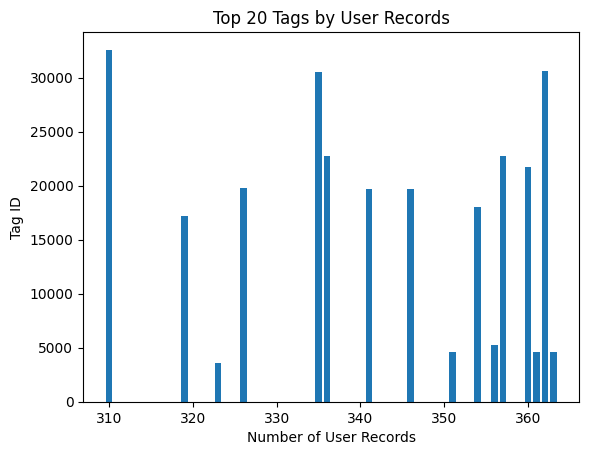

In [16]:
import matplotlib.pyplot as plt
import numpy as np
tag_counts = book_tags.groupby('tag_id').size().reset_index(name='user_records')
tag_counts = tag_counts.sort_values(by='user_records', ascending=False) #putting in descending order
top_20_tags = tag_counts.head(20) #Select the top 20 tags
print(top_20_tags)
x=np.array(top_20_tags['tag_id'])
y=np.array(top_20_tags['user_records'])

# print(x)
# print(y)
plt.bar(y,x)
plt.xlabel('Number of User Records')
plt.ylabel('Tag ID')
plt.title('Top 20 Tags by User Records')
plt.show()

In [ ]:
# x1 = np.array([ 4600, 21689 , 4605, 30574, 21773, 11557 ,22743 , 4615,  5207 , 8717 ,18045 , 4594,
#  19733, 19738, 30521 ,22753 ,19742  ,3611, 17213,  1642])
# y1 = np.array([402 ,401, 400, 400, 399, 396, 395, 395, 394 ,391 ,391, 389, 379 ,378 ,370, 367, 363, 359,
#  353 ,346])

# plt.bar(y1,x1)
# plt.show()